# Metric 2 - gun seizures

,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
_id,,,,,,,,,,,,,,,,,,,
1,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
2,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
3,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
4,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
5,"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN


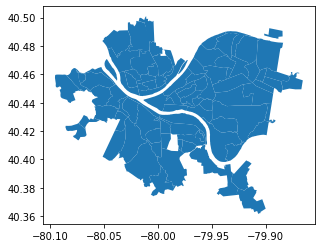

In [50]:
import pandas as pd 
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

gun_seizures = pd.read_csv("gun_seizures.csv", index_col="_id") # use the column named _id as the row index



neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot()

gun_seizures.head()



 I am measuring the **amount of gun seizures by neighborhood.** There are two ways you could think about this in the context of a place to be “the best criminal”, that being the neighborhood with the **most** or **least** gun seizures. 
 
Most gun seizures alludes to there being more criminals in that neighborhood, which would be nice if you're a young and lonely aspiring criminal. Plus, this makes that neighborhood actually have more crime, which would be good for our aspiring criminals. 

### I will be finding the neighborhood with the most gun seizures. 


In [2]:
numseizures = gun_seizures.groupby("neighborhood")["total_count"].sum()

numseizures.sort_values(ascending=False)

neighborhood
Homewood South      345
South Side Flats    208
Homewood North      159
Brighton Heights    149
East Liberty        148
                   ... 
Mt. Oliver            4
Oakwood               4
Regent Square         4
Summer Hill           3
Swisshelm Park        3
Name: total_count, Length: 88, dtype: int64


each entry has a total guns seized column. I summed together the totals of these, grouping by neighborhood. This gives the sum of all of these counts based by neighborhood, in descending order. 

In [43]:


seizure_amount = dict()

def Merge(dict1, dict2):
    return(dict2.update(dict1))


for index, row in gun_seizures.iterrows():
    currenthood = row["neighborhood"]
    count = row["total_count"]
    
   
    if currenthood not in seizure_amount:
        seizure_amount[currenthood] = count 
        
    else:
        seizure_amount[currenthood] = count + seizure_amount[currenthood]
        
    
index_len = len(seizure_amount)

print(index_len)

indexlist = []
i = 0

while i < index_len:
    indexlist.insert(i,i)
    i += 1
    
print(indexlist)

indexed_dictionary = dict()

seizureitems = seizure_amount.items()

i = 0

while i < index_len:
    for key in seizureitems:
        indexed_dictionary[i] = key
        i += 1
        
print(indexed_dictionary)    


seizuredf = pd.DataFrame.from_dict(indexed_dictionary, orient = "index", columns = ["hood","seizures"])
seizuredf = seizuredf.dropna()




print(seizuredf)



89
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88]
{0: ('Mount Oliver Borough', 9), 1: ('Sheraden', 121), 2: ('Terrace Village', 45), 3: ('Brighton Heights', 149), 4: (nan, 1004), 5: ('Westwood', 10), 6: ('East Liberty', 148), 7: ('Upper Lawrenceville', 20), 8: ('Marshall-Shadeland', 148), 9: ('Beechview', 101), 10: ('East Hills', 137), 11: ('Arlington', 40), 12: ('Arlington Heights', 10), 13: ('Mount Washington', 90), 14: ('South Side Flats', 208), 15: ('Hazelwood', 144), 16: ('Homewood South', 345), 17: ('Greenfield', 25), 18: ('Bloomfield', 58), 19: ('Beltzhoover', 46), 20: ('Homewood North', 159), 21: ('Upper Hill', 37), 22: ('Perry South', 136), 23: ('Lincoln-Lemington-Belmar', 136), 24:

Does the same math operations, just saves in a dictionary, then to a pandas dataframe to be used for a map visualization 

It also creates an indexed dictionary with the neighborhoods indexed to be turned into a dataframe, so I could merge that dataframe with the map dataframe.

In [16]:
seizuredf.head()

,Mount Oliver Borough,Sheraden,Terrace Village,Brighton Heights,NaN,Westwood,East Liberty,Upper Lawrenceville,Marshall-Shadeland,Beechview,...,Oakwood,Windgap,Bon Air,North Shore,Lincoln Place,Mt. Oliver,West End,Esplen,Hays,Swisshelm Park
Mount Oliver Borough,9,121,45,149,1004,10,148,20,148,101,...,4,15,12,20,10,4,6,10,8,3
Sheraden,9,121,45,149,1004,10,148,20,148,101,...,4,15,12,20,10,4,6,10,8,3
Terrace Village,9,121,45,149,1004,10,148,20,148,101,...,4,15,12,20,10,4,6,10,8,3
Brighton Heights,9,121,45,149,1004,10,148,20,148,101,...,4,15,12,20,10,4,6,10,8,3
NaN,9,121,45,149,1004,10,148,20,148,101,...,4,15,12,20,10,4,6,10,8,3


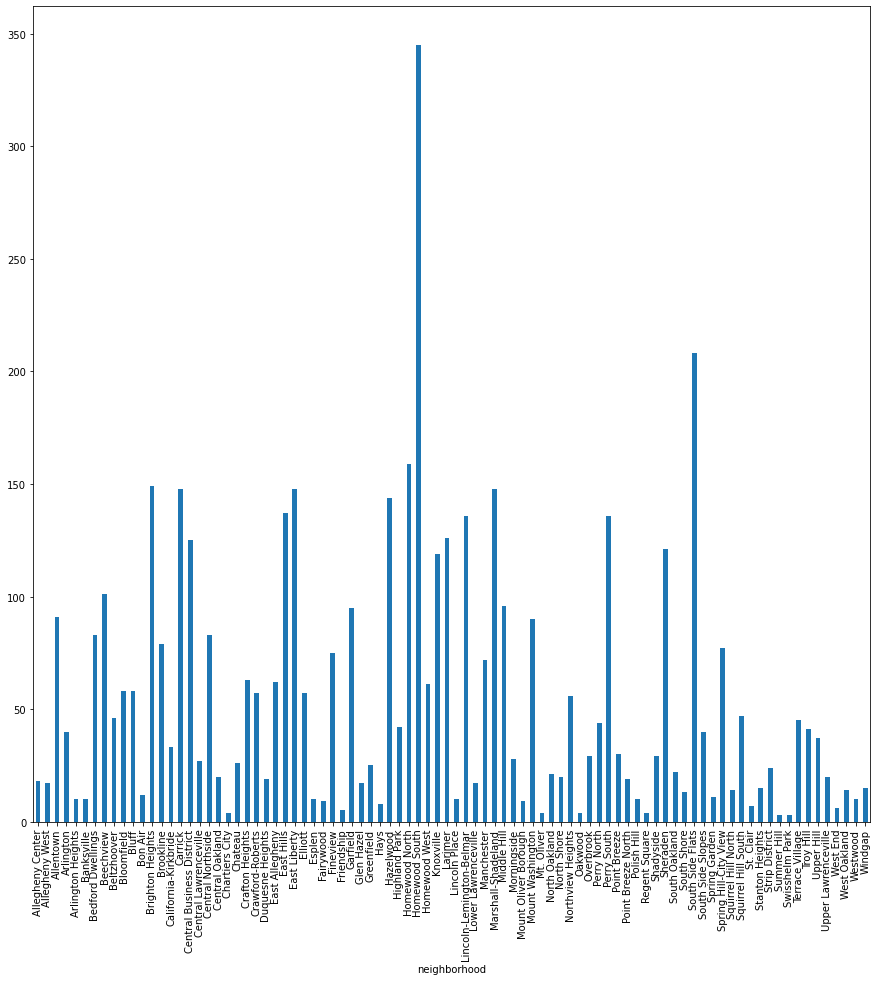

In [28]:
numseizures = gun_seizures.groupby("neighborhood")["total_count"].sum().plot(kind = "bar", figsize = (15,15))

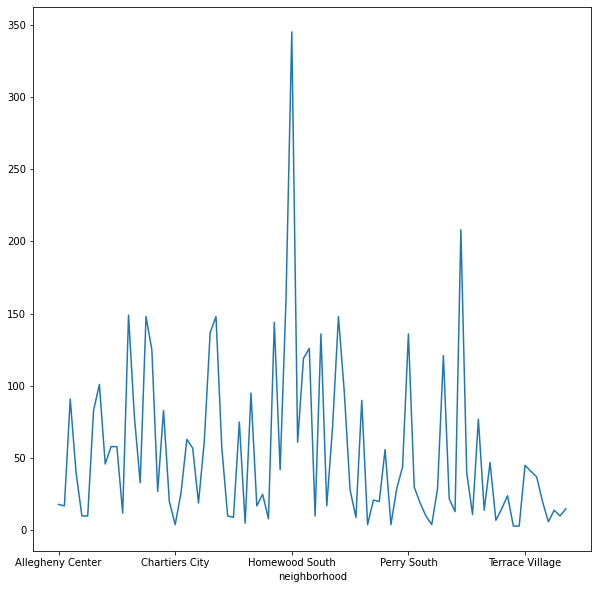

In [22]:
numseizures.plot(figsize=(10,10))

In [53]:
# do the merge
seizure_map = neighborhoods.merge(seizuredf, how='left', left_on='hood', right_on='hood')
# look at the head to confirm it merged correctly
seizure_map[['hood','seizures','geometry']].head()

,hood,seizures,geometry
0,Central Oakland,20.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,21.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,14.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,57.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,24.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


I merged the map dataframe, and my seizure dataframe to plot the data on a map

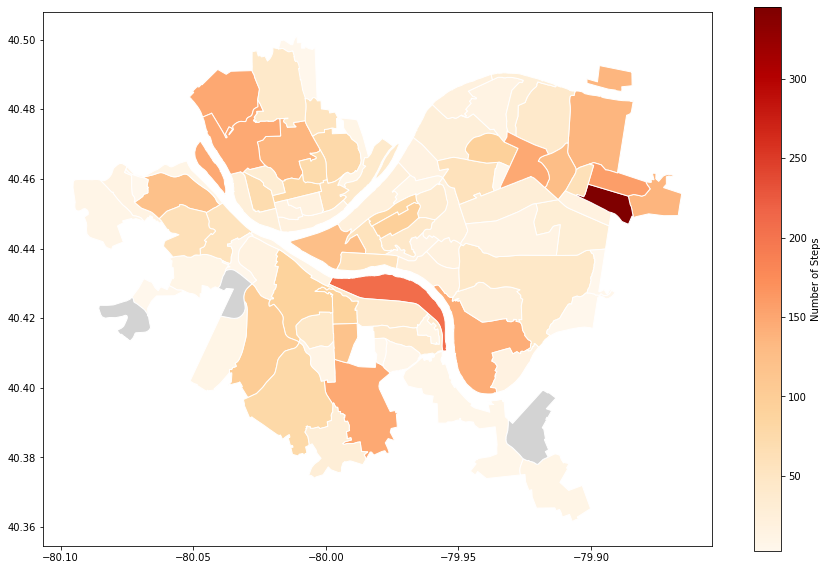

In [54]:
seizure_map.plot(column='seizures', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of seizures"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

this map graphs the neighborhoods, the more red, the more gun seizures. 

my data would seem to confirm that **Homewood South** overwhelmingly has the most firearm seizures, and the bar and regular graph support this conclusion. 

The graph visualization is a bit unruly, but does well at showing how much of a landslide this firearm value is than all the other neighborhoods. The neighborhood map supports the other graph's conclusions.